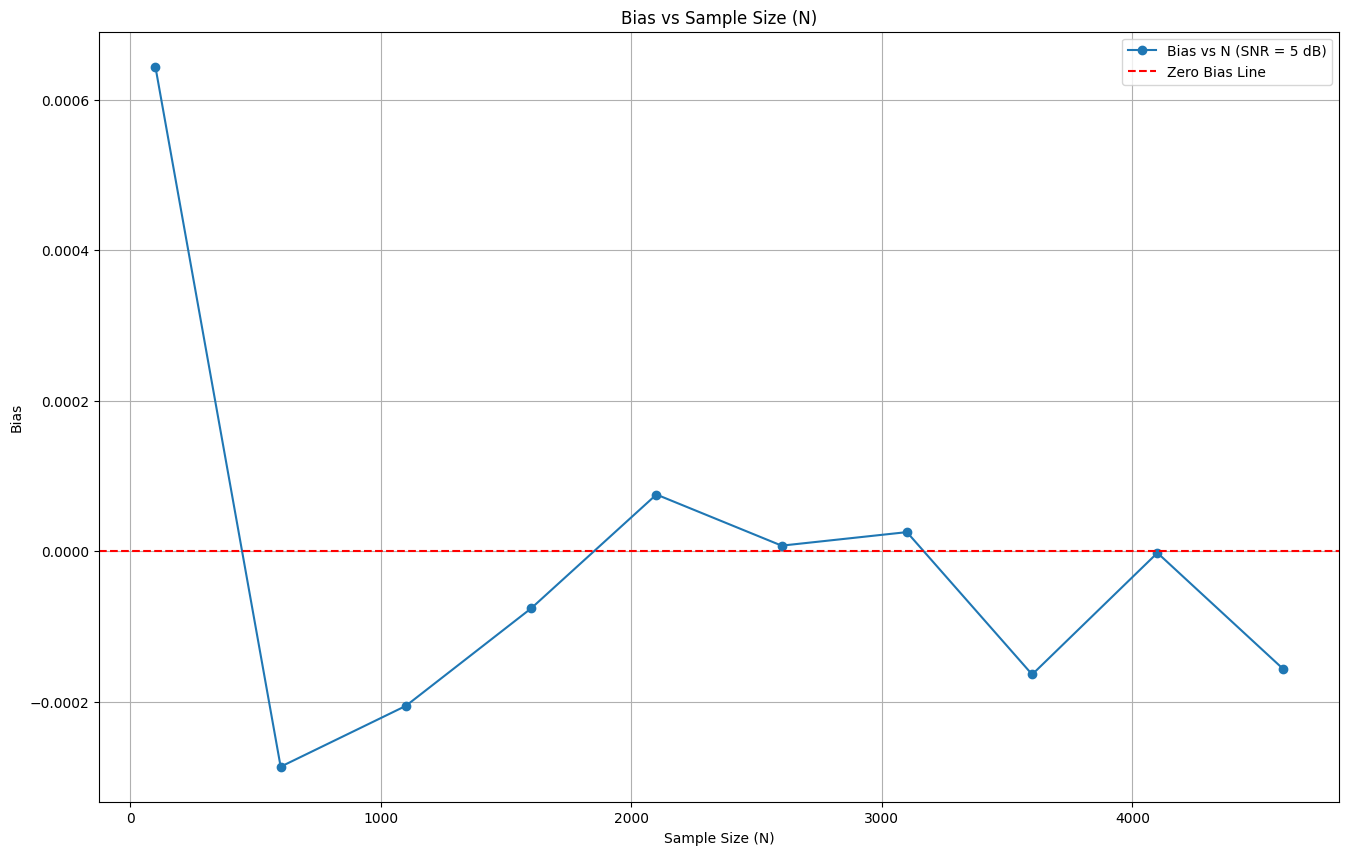

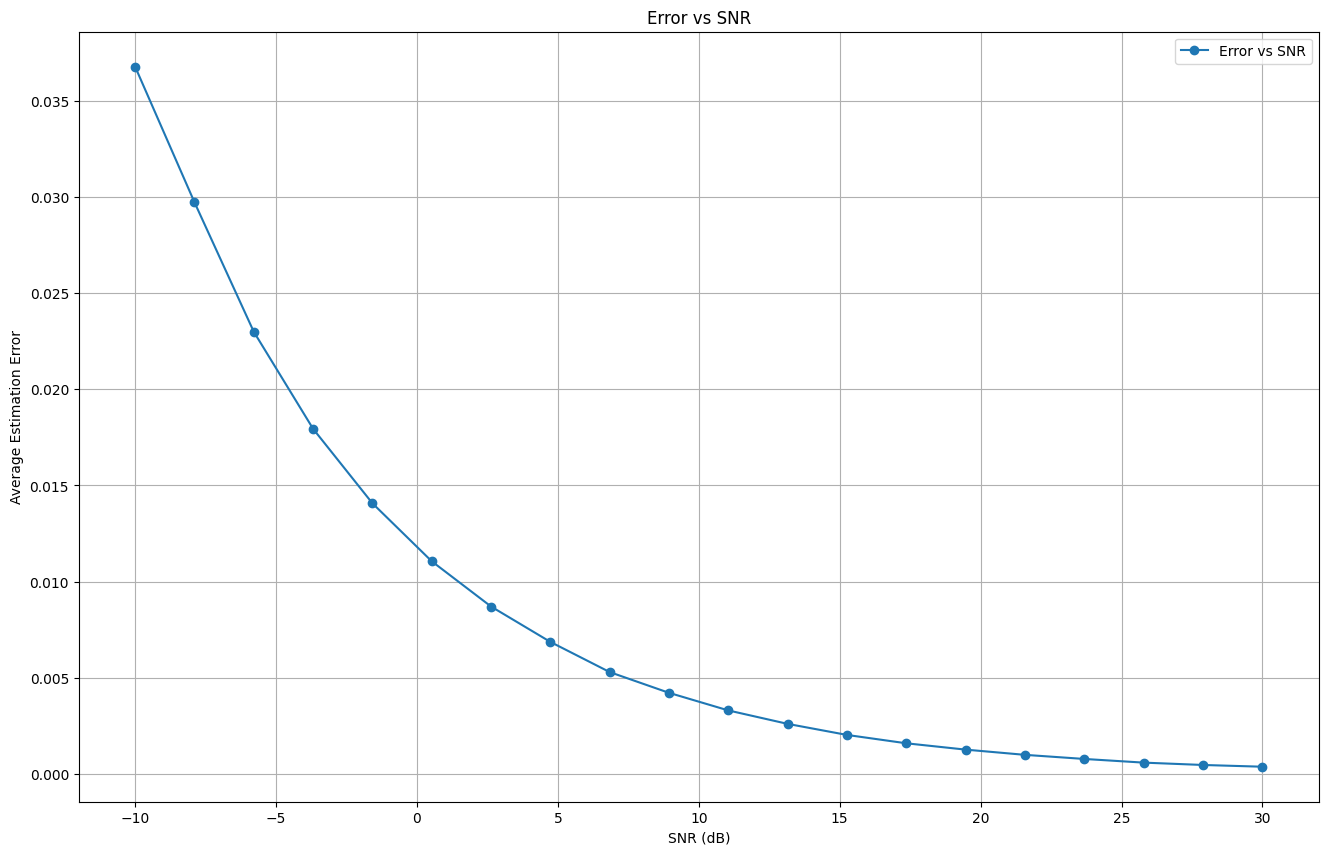

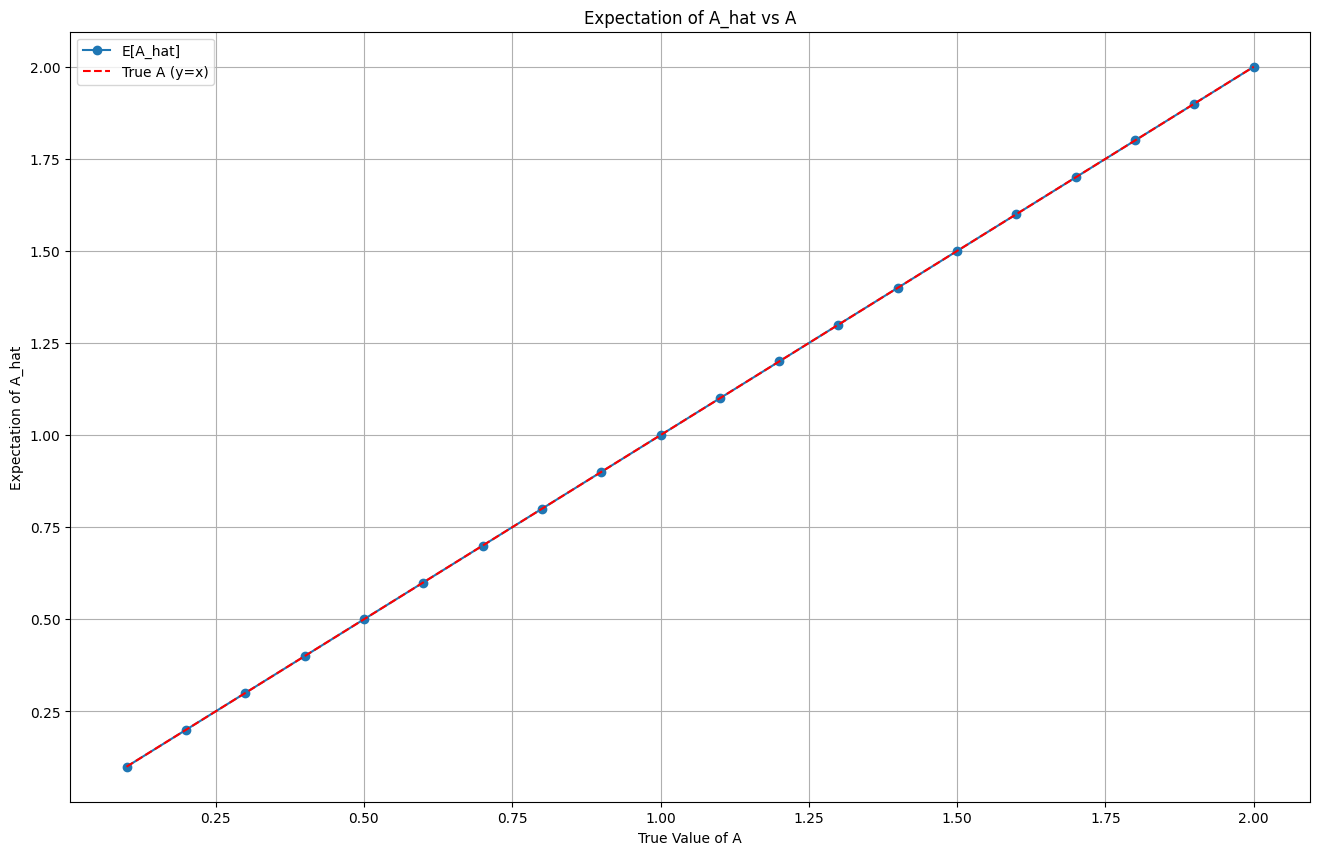

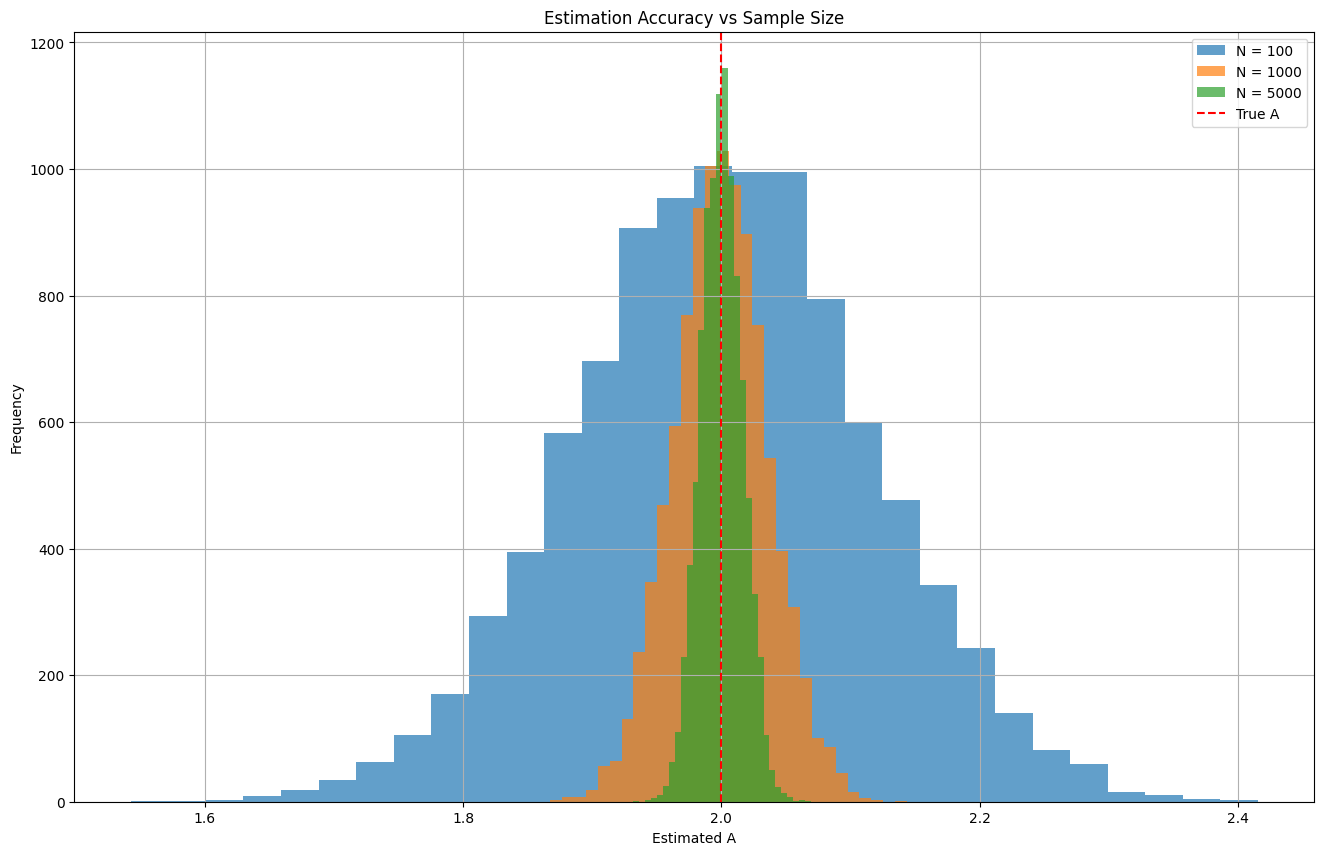

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for Bias vs N plot
A = 1  # True value of A
SNR_dB_bias = 5  # Fixed SNR in dB for Bias vs N
snr_linear_bias = 10**(SNR_dB_bias / 10)
N_values = np.arange(100, 5000, 500)  # Different sample sizes for bias analysis
num_experiments = 10000  # Number of experiments for averaging

# Parameters for Error vs SNR and Expectation of A_hat vs A plot
N = 1000  # Number of samples in each experiment
SNR_dB = np.linspace(-10, 30, 20)  # SNR values in dB for error vs SNR plot
A_values = np.linspace(0.1, 2, 20)  # True values of A for expectation plot

# Initialize arrays for storing results
bias_values = []
errors = []
expected_A_hat = []

# Bias vs Sample Size (N) with SNR = 5 dB
for N in N_values:
    sigma_w = np.sqrt(A**2 / snr_linear_bias)  # Noise standard deviation
    estimated_A_values = []
    
    for _ in range(num_experiments):
        w = np.random.normal(0, sigma_w, N)  # Generate noise samples
        X = A + w  # Generate samples
        A_cap = np.mean(X)  # Calculate the estimator
        estimated_A_values.append(A_cap)
    
    # Calculate bias as E[A_cap] - A
    bias = np.mean(estimated_A_values) - A
    bias_values.append(bias)

# Error vs SNR
A_fixed = 1  # Fixed true value of A for the error vs SNR plot

for snr_db in SNR_dB:
    snr_linear = 10**(snr_db / 10)  # Convert SNR from dB to linear scale
    sigma_w = np.sqrt(A_fixed**2 / snr_linear)  # Noise standard deviation
    estimated_A_values = []
    
    for _ in range(num_experiments):
        w = np.random.normal(0, sigma_w, N)  # Generate noise samples
        X = A_fixed + w  # Generate samples
        A_cap = np.mean(X)  # Calculate the estimator
        estimated_A_values.append(A_cap)
    
    average_error = np.mean(np.abs(A_fixed - np.array(estimated_A_values)))
    errors.append(average_error)

# Expectation of A_hat vs A
snr_db_fixed = 20  # Fixed SNR for the expectation plot
snr_linear_fixed = 10**(snr_db_fixed / 10)

for A in A_values:
    sigma_w = np.sqrt(A**2 / snr_linear_fixed)  # Noise standard deviation
    estimated_A_values = []
    
    for _ in range(num_experiments):
        w = np.random.normal(0, sigma_w, N)  # Generate noise samples
        X = A + w  # Generate samples
        A_cap = np.mean(X)  # Calculate the estimator
        estimated_A_values.append(A_cap)
    
    expected_A_hat.append(np.mean(estimated_A_values))

# Additional Visualization: Estimation Accuracy vs Sample Size
sample_sizes = [100, 1000, 5000]  # Representative sample sizes
# Plot 1: Bias vs Sample Size (N)
plt.figure(figsize=(16, 10))
plt.plot(N_values, bias_values, marker='o', label=f'Bias vs N (SNR = {SNR_dB_bias} dB)')
plt.axhline(0, color='red', linestyle='--', label='Zero Bias Line')
plt.xlabel('Sample Size (N)')
plt.ylabel('Bias')
plt.title('Bias vs Sample Size (N)')
plt.grid(True)
plt.legend()
plt.show()

# Plot 2: Error vs SNR
plt.figure(figsize=(16, 10))
plt.plot(SNR_dB, errors, marker='o', label='Error vs SNR')
plt.xlabel('SNR (dB)')
plt.ylabel('Average Estimation Error')
plt.title('Error vs SNR')
plt.grid(True)
plt.legend()
plt.show()

# Plot 3: Expectation of A_hat vs A
plt.figure(figsize=(16, 10))
plt.plot(A_values, expected_A_hat, marker='o', label='E[A_hat]')
plt.plot(A_values, A_values, linestyle='--', color='red', label='True A (y=x)')
plt.xlabel('True Value of A')
plt.ylabel('Expectation of A_hat')
plt.title('Expectation of A_hat vs A')
plt.grid(True)
plt.legend()
plt.show()

# Plot 4: Estimation Accuracy vs Sample Size
plt.figure(figsize=(16, 10))
for N in sample_sizes:
    sigma_w = np.sqrt(A**2 / snr_linear_bias)
    estimated_A_values = []
    
    for _ in range(num_experiments):
        w = np.random.normal(0, sigma_w, N)
        X = A + w
        A_cap = np.mean(X)
        estimated_A_values.append(A_cap)
    
    plt.hist(estimated_A_values, bins=30, alpha=0.7, label=f'N = {N}')
plt.axvline(A, color='red', linestyle='--', label='True A')
plt.xlabel('Estimated A')
plt.ylabel('Frequency')
plt.title('Estimation Accuracy vs Sample Size')
plt.legend()
plt.grid(True)
plt.show()
